# Lab | Cleaning categorical data

### Context 
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Objectives:

Retain customers, Analyze relevant customer data, Develop focused customer retention programs. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in ('files_for_lab') folder. In this lab we will explore categorical data.

## Instructions

Import the necessary libraries if you are starting a new notebook.

In [1]:
# Pandas functions
import pandas as pd
# Numpy functions
import numpy as np
# Math functions
import math
# Matplot
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Remove warning errors
import warnings
warnings.filterwarnings('ignore')
# Cell-to-cell script
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

First look at its main features (head, shape, info).


In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,GK73582,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134,NaN,NaN,NaN,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.4
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134,NaN,NaN,NaN,37657.4,30379.9,0,0,33889.5,62320,99981


Rename the columns so they follow the PE8 (snake case).

In [6]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = customer_df.columns.str.replace('EmploymentStatus','Employment_Status')
customer_df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'Employment_Status', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

Change effective to date column to datetime format.

In [7]:
customer_df['Effective_To_Date']= pd.to_datetime(customer_df['Effective_To_Date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer_Lifetime_Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective_To_Date              9134 non-null   datetime64[ns]
 7   Employment_Status              9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location_Code                  9134 non-null   object        
 11  Marital_Status   

Check NaN values per column.

In [8]:
customer_df.isnull().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
Employment_Status                0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Get categorical features.

In [9]:
categorical_df = customer_df.select_dtypes(include=['object'])
categorical_df

,Customer,State,Response,Coverage,Education,Employment_Status,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


What should we do with the customer_id column?

In [10]:
customer_df = customer_df.drop(['Customer'], axis=1)
customer_df

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,Location_Code,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [11]:
customer_df['Income'] = customer_df['Income'].astype(float)
continuous_df = customer_df.select_dtypes(include=['float64'])
continuous_df

,Customer_Lifetime_Value,Income,Total_Claim_Amount
0,2763.519279,56274.0,384.811147
1,6979.535903,0.0,1131.464935
2,12887.431650,48767.0,566.472247
3,7645.861827,0.0,529.881344
4,2813.692575,43836.0,138.130879
...,...,...,...
9129,23405.987980,71941.0,198.234764
9130,3096.511217,21604.0,379.200000
9131,8163.890428,0.0,790.784983
9132,7524.442436,21941.0,691.200000


In [12]:
discrete_df = customer_df.select_dtypes(include=['int64'])
discrete_df

,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


Plot a correlation matrix, what can you see?

In [13]:
X = pd.concat([continuous_df, discrete_df], axis=1)

In [14]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,Customer_Lifetime_Value,Income,Total_Claim_Amount,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,-0.762878,0.612827,-0.169640,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,2.400737,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.455734,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.329769,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-1.018843,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


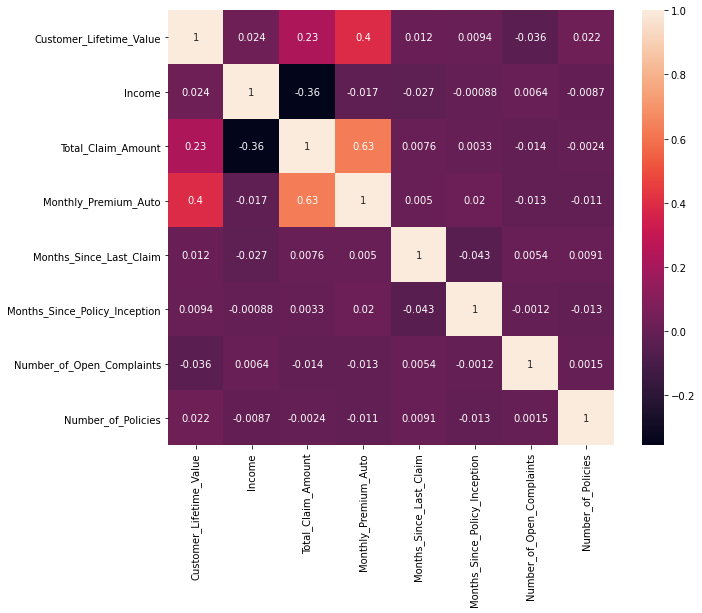

,Customer_Lifetime_Value,Income,Total_Claim_Amount,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
Customer_Lifetime_Value,1.000000,0.024366,0.226451,0.396262,0.011517,0.009418,-0.036343,0.021955
Income,0.024366,1.000000,-0.355254,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
Total_Claim_Amount,0.226451,-0.355254,1.000000,0.632017,0.007563,0.003335,-0.014241,-0.002354
Monthly_Premium_Auto,0.396262,-0.016665,0.632017,1.000000,0.005026,0.020257,-0.013122,-0.011233
Months_Since_Last_Claim,0.011517,-0.026715,0.007563,0.005026,1.000000,-0.042959,0.005354,0.009136
Months_Since_Policy_Inception,0.009418,-0.000875,0.003335,0.020257,-0.042959,1.000000,-0.001158,-0.013333
Number_of_Open_Complaints,-0.036343,0.006408,-0.014241,-0.013122,0.005354,-0.001158,1.000000,0.001498
Number_of_Policies,0.021955,-0.008656,-0.002354,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [15]:
corr_matrix=X_scaled.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
corr_matrix

Create a function to plot every discrete variables. 
Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

<AxesSubplot:xlabel='Monthly_Premium_Auto', ylabel='Density'>

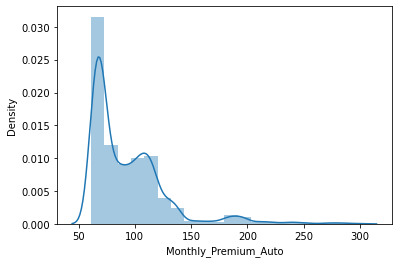

<AxesSubplot:xlabel='Months_Since_Last_Claim', ylabel='Density'>

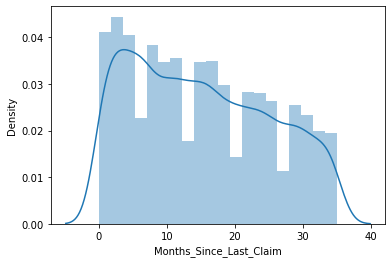

<AxesSubplot:xlabel='Months_Since_Policy_Inception', ylabel='Density'>

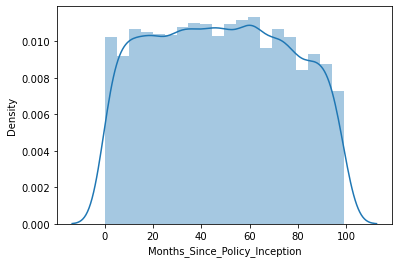

<AxesSubplot:xlabel='Number_of_Open_Complaints', ylabel='Density'>

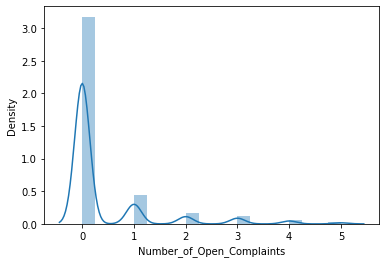

<AxesSubplot:xlabel='Number_of_Policies', ylabel='Density'>

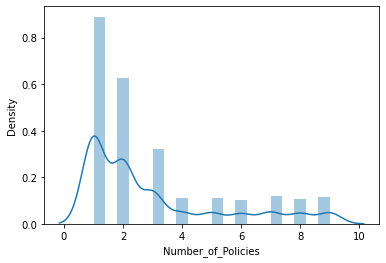

In [16]:
for i in range(len(discrete_df.columns)):
    sns.distplot(discrete_df.iloc[:,i],bins=20)
    plt.show()

What can you see in the plots?


+++ Monthly Premium Auto column presents possible outliers and have to be clean. +++

Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


<AxesSubplot:xlabel='Customer_Lifetime_Value'>

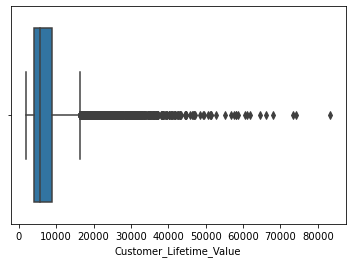

<AxesSubplot:xlabel='Income'>

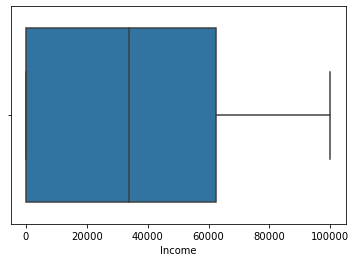

<AxesSubplot:xlabel='Total_Claim_Amount'>

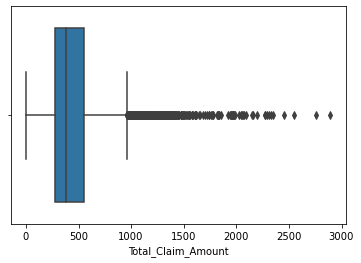

In [25]:
for i in range(len(continuous_df.columns)):
    sns.boxplot(continuous_df.iloc[:,i])
    plt.show()

Have you found outliers? If you have, what should we do with them?


In [18]:
# Clean and check for normal distribution 
def log_transfom_clean(x):
    if np.isfinite(x) and x>=0:
        return np.log(x)
    else:
        return np.nan

In [19]:
continuous_df['Customer_Lifetime_Value'] = pd.Series(continuous_df['Customer_Lifetime_Value'].apply(log_transfom_clean))
continuous_df['Total_Claim_Amount'] = pd.Series(continuous_df['Total_Claim_Amount'].apply(log_transfom_clean))

<AxesSubplot:xlabel='Customer_Lifetime_Value', ylabel='Density'>

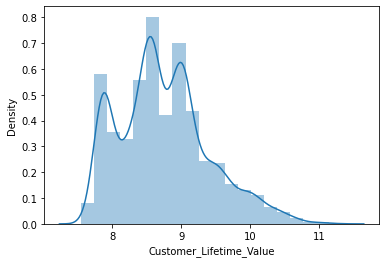

<AxesSubplot:xlabel='Income', ylabel='Density'>

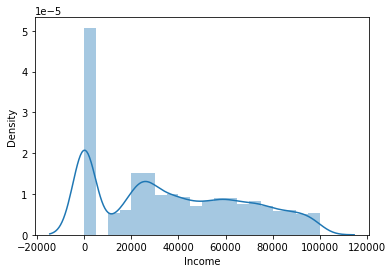

<AxesSubplot:xlabel='Total_Claim_Amount', ylabel='Density'>

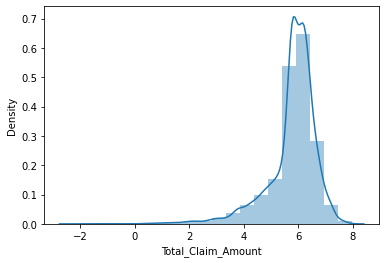

In [20]:
for i in range(len(continuous_df.columns)):
    sns.distplot(continuous_df.iloc[:,i],bins=20)
    plt.show()

Check nan values per column.

In [21]:
continuous_df.isnull().sum()
discrete_df.isnull().sum()
categorical_df.isnull().sum()

Customer_Lifetime_Value    0
Income                     0
Total_Claim_Amount         0
dtype: int64

Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
dtype: int64

Customer             0
State                0
Response             0
Coverage             0
Education            0
Employment_Status    0
Gender               0
Location_Code        0
Marital_Status       0
Policy_Type          0
Policy               0
Renew_Offer_Type     0
Sales_Channel        0
Vehicle_Class        0
Vehicle_Size         0
dtype: int64

Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [22]:
X.dtypes
X.nunique()

Customer_Lifetime_Value          float64
Income                           float64
Total_Claim_Amount               float64
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
dtype: object

Customer_Lifetime_Value          8041
Income                           5694
Total_Claim_Amount               5106
Monthly_Premium_Auto              202
Months_Since_Last_Claim            36
Months_Since_Policy_Inception     100
Number_of_Open_Complaints           6
Number_of_Policies                  9
dtype: int64

In [23]:
def function(x):
    if len(x.value_counts()) > 1000:
        return 'Continuous Data'
    else:
        return 'Discrete Data'
X.apply(function)
discrete_df = X.drop(['Customer_Lifetime_Value','Income','Total_Claim_Amount'], axis=1)
discrete_df.head()
continuous_df = X.loc[:,['Customer_Lifetime_Value','Income','Total_Claim_Amount']]
continuous_df.head()

Customer_Lifetime_Value          Continuous Data
Income                           Continuous Data
Total_Claim_Amount               Continuous Data
Monthly_Premium_Auto               Discrete Data
Months_Since_Last_Claim            Discrete Data
Months_Since_Policy_Inception      Discrete Data
Number_of_Open_Complaints          Discrete Data
Number_of_Policies                 Discrete Data
dtype: object

,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


,Customer_Lifetime_Value,Income,Total_Claim_Amount
0,2763.519279,56274.0,384.811147
1,6979.535903,0.0,1131.464935
2,12887.431650,48767.0,566.472247
3,7645.861827,0.0,529.881344
4,2813.692575,43836.0,138.130879
